# Create MBTiles for Cerrado cropland and pasture areas

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt
import subprocess

In [48]:
def create_mbtiles(source_path, dest_path, layer_name, opts="-zg --drop-densest-as-needed --extend-zooms-if-still-dropping --force --read-parallel"):
    """
    Use tippecanoe to create a MBTILE at dest_path from source_path.
    layer_name is used for the name of the layer in the MBTILE.
    Regex file path (/*.geojson) is supported for source_path.
    """
    cmd = f"tippecanoe -o {dest_path} -l {layer_name} {opts} {source_path}"
    print(f"Processing: {cmd}")
    r = subprocess.call(cmd, shell=True)
    if r == 0:
        print("Task created")
    else:
        print("Task failed")
    print("Finished processing")

## Croplands

In [33]:
gdf = gpd.read_file('../data/agricultura_agrosatelite/agricultura_agrosatelite_2001')

(-18.0, -18.5)

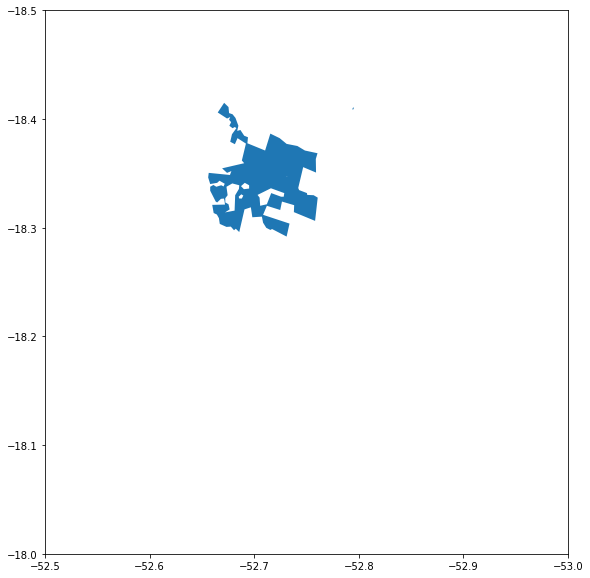

In [42]:
fig, ax = plt.subplots(figsize=(20, 10))
gdf.iloc[:1000].plot(ax=ax)
plt.xlim(-52.5, -53)
plt.ylim(-18, -18.5)

In [35]:
gdf['geometry'] = gdf['geometry'].apply(lambda x: x.simplify(0.001)) 

(-18.0, -18.5)

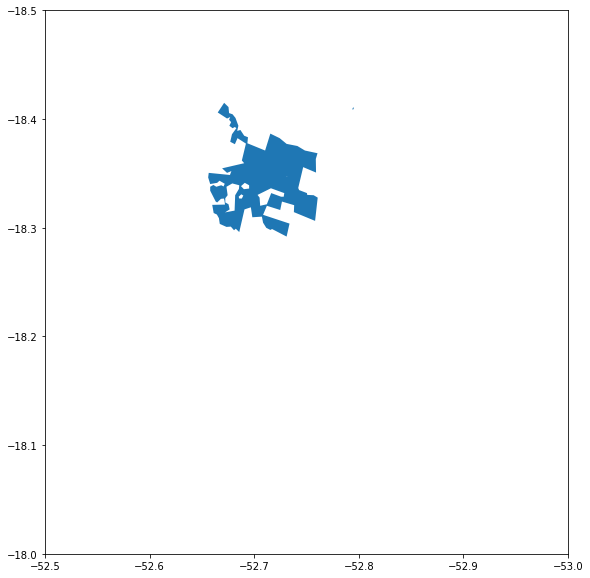

In [43]:
fig, ax = plt.subplots(figsize=(20, 10))
gdf.iloc[:1000].plot(ax=ax)
plt.xlim(-52.5, -53)
plt.ylim(-18, -18.5)

In [38]:
gdf.to_file('../data/agricultura_agrosatelite/agricultura_agrosatelite_2001_0001/agricultura_agrosatelite_2001.shp')

## Pastures

In [44]:
gdf = gpd.read_file('../data/pasture_cerrado/pasture_cerrado_2018/pasture_cerrado_2018.shp')

In [68]:
gdf[['area_ha', 'municipio', 'municipio', 'geometry']].to_file('../data/pasture_cerrado/pasture_cerrado_2018.json', driver="GeoJSON")

In [ ]:
-pt or --no-tiny-polygon-reduction: Don't combine the area of very small polygons into small squares that represent their combined area.

In [ ]:
--coalesce-densest-as-needed: If the tiles are too big at low or medium zoom levels, merge as many features together as are necessary to allow tiles to be created with those features that are still distinguished

In [73]:
layer_name = 'pasture_cerrado_2018'
source_path = '../data/pasture_cerrado/pasture_cerrado_2018.json'
dest_path = '../data/pasture_cerrado/pasture_cerrado_2018.mbtiles'
#create_mbtiles(source_path, dest_path, layer_name, opts="-zg --drop-densest-as-needed --extend-zooms-if-still-dropping --force --read-parallel")
create_mbtiles(source_path, dest_path, layer_name, opts="-zg --force --read-parallel")

Processing: tippecanoe -o ../data/pasture_cerrado/pasture_cerrado_2018.mbtiles -l pasture_cerrado_2018 -zg --force --read-parallel ../data/pasture_cerrado/pasture_cerrado_2018.json
Task created
Finished processing


In [74]:
!mbview --port 9000 ../data/pasture_cerrado/pasture_cerrado_2018.mbtiles

Listening on http://localhost:9000
^C
